<a href="https://colab.research.google.com/github/anithathavamani/ML-dataset/blob/main/customer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("/content/customer.csv")

In [3]:
data.shape

(200, 5)

In [4]:
data.head()

,Cust_Number,Yearly_Income,Age,Cust_Spend_Score,Sex
0,CUSTID1,15000,18,44,0
1,CUSTID2,15000,18,79,0
2,CUSTID3,16000,23,8,1
3,CUSTID4,16000,25,79,1
4,CUSTID5,17000,32,41,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Cust_Number       200 non-null    object
 1   Yearly_Income     200 non-null    int64 
 2   Age               200 non-null    int64 
 3   Cust_Spend_Score  200 non-null    int64 
 4   Sex               200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
data.describe()

,Yearly_Income,Age,Cust_Spend_Score,Sex
count,200.000000,200.000000,200.000000,200.000000
mean,60560.000000,39.095000,51.380000,0.560000
std,26264.721165,14.088592,26.034488,0.497633
min,15000.000000,17.000000,1.000000,0.000000
25%,41500.000000,28.000000,33.750000,0.000000
50%,61500.000000,36.000000,51.000000,1.000000
75%,78000.000000,49.250000,72.000000,1.000000
max,137000.000000,73.000000,103.000000,1.000000


In [7]:
# drop the column 'Cust_Number' using drop()
# 'axis = 1' drops the specified column
data = data.drop('Cust_Number',axis=1)
# consider the numeric variables
data = data.drop(['Sex'], axis = 1)


In [8]:
data.head()

,Yearly_Income,Age,Cust_Spend_Score
0,15000,18,44
1,15000,18,79
2,16000,23,8
3,16000,25,79
4,17000,32,41


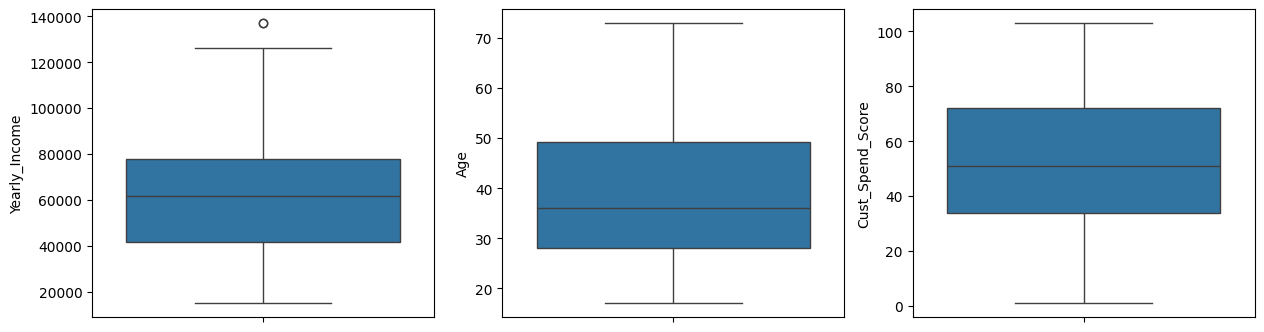

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
# 'figsize' sets the figure size
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize=(15, 4))

# use for loop to plot the boxplot for each variable
for variable, subplot in zip(data.columns, ax.flatten()):

    # use boxplot() to plot the graph
    # pass the axes for the plot to the parameter, 'ax'
    sns.boxplot(data[variable], ax = subplot)

# display the plot
plt.show()

In [10]:
# consider the observations with yearly income less than 130000
data = data[data['Yearly_Income'] < 130000]

In [11]:
data.shape

(198, 3)

In [12]:
# consider the features 'Cust_Spend_Score' and 'Yearly_Income'
X_filtered = data[['Cust_Spend_Score', 'Yearly_Income']]

# print top 5 observations of X
X_filtered.head()

,Cust_Spend_Score,Yearly_Income
0,44,15000
1,79,15000
2,8,16000
3,79,16000
4,41,17000


In [13]:
from sklearn.preprocessing import StandardScaler

# initialize the StandardScaler
X_norm = StandardScaler()

# normalize all the columns of the dataframe 'X_filtered'
num_norm = X_norm.fit_transform(X_filtered)

# create a dataframe of scaled numerical variables
# pass the required column names to the parameter 'columns'
X = pd.DataFrame(num_norm, columns = X_filtered.columns)

X.head()

,Cust_Spend_Score,Yearly_Income
0,-0.283684,-1.779171
1,1.068399,-1.779171
2,-1.674398,-1.739447
3,1.068399,-1.739447
4,-0.399577,-1.699723


In [14]:
# import various functions from sklearn
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans
# create several cluster combinations ranging from 1 to 20 and observe the wcss (Within Cluster Sum of Squares) for each cluster
# consider an empty list to store the WCSS
wcss  = []

# use for loop to perform K-means with different values of K
# set the 'random_state' to obtain the same centroid initialization for each code run
# fit the model on scaled data
# append the value of WCSS for each K to the list 'wcss'
# the 'inertia_' retuns the WCSS for specific value of K
for i in range(1,21):
    kmeans = KMeans(n_clusters = i, random_state = 10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [15]:
wcss

[396.0000000000001,
 264.11904162019016,
 157.01117743011798,
 107.15541991919262,
 62.1172607745671,
 53.30125890859111,
 45.52653343748635,
 36.878530824221016,
 32.27339694894124,
 28.782323475905564,
 25.836672477019306,
 23.3890809510223,
 21.331219268464178,
 19.894328310105898,
 18.699898973316284,
 17.102210055866536,
 15.526390883762485,
 14.652766344211361,
 13.42842500608926,
 12.49477037042885]

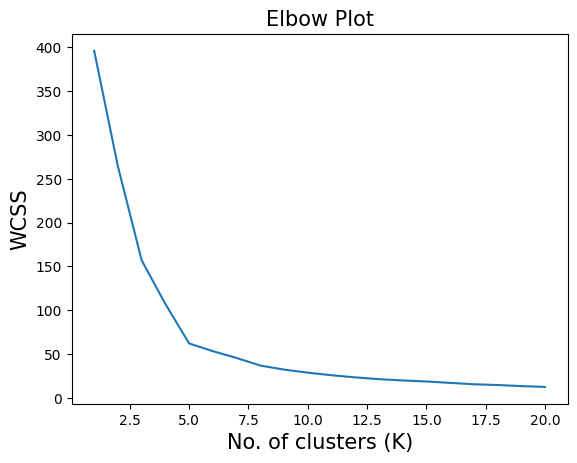

In [16]:
# visualize the elbow plot to get the optimal value of K
plt.plot(range(1,21), wcss)

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Elbow Plot', fontsize = 15)
plt.xlabel('No. of clusters (K)', fontsize = 15)
plt.ylabel('WCSS', fontsize = 15)

# display the plot
plt.show()

In [17]:
# create a list for different values of K
n_clusters = [2, 3, 4, 5, 6,7,8,9]

# use 'for' loop to build the clusters
# 'random_state' returns the same sample each time you run the code
# fit and predict on the scaled data
# 'silhouette_score' function computes the silhouette score for each K
for K in n_clusters:
    cluster = KMeans (n_clusters= K, random_state= 10)
    predict = cluster.fit_predict(X)
    score = silhouette_score(X, predict, random_state= 10)
    print ("For {} clusters the silhouette score is {})".format(K, score))

For 2 clusters the silhouette score is 0.30326001084082965)
For 3 clusters the silhouette score is 0.464085451156394)
For 4 clusters the silhouette score is 0.4941073313280528)
For 5 clusters the silhouette score is 0.5582289588979077)
For 6 clusters the silhouette score is 0.5424905196078039)
For 7 clusters the silhouette score is 0.4596998896881322)
For 8 clusters the silhouette score is 0.45543289610526966)
For 9 clusters the silhouette score is 0.44734164907773366)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8